In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('mountain.jpg', 0)
#해당 경로의 이미지를 불러옴(현재 디렉터리에 이미지가 있어야함)
cv2.imshow('image', img) # 이미지 출력(창 이름이 'image')
cv2.waitKey(0) # 키 이벤트가 작동할 때까지 대기
cv2.destroyAllWindows() # 모든 창 닫기

In [ ]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
#기본값은 WINDOW_AUTOSIZE이며, NORMAL은 창 사이즈 조절 가능
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite('mountain.png', img)
# img를 다른 이름(mountain.png)으로 저장

In [7]:
img = cv2.imread('mountain.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF
if k == 27: # ESC를 누르면 창 닫기
    cv2.destroyAllWindows()
elif k == ord('s'): # S를 누르면 png로 저장
    cv2.imwrite('mountain.png',img)
cv2.destroyAllWindows()

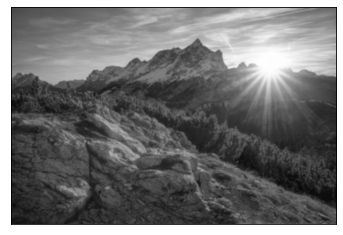

In [8]:
img = cv2.imread('mountain.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [5]:
cap = cv2.VideoCapture(0) #0은 내장 카메라, 1부터는 외장 카메라
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray) #gray 대신 frame을 넣으면 컬러 출력
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


In [3]:
cap = cv2.VideoCapture('vtest.mp4') #동영상 파일을 불러옴
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
#동영상 파일로 저장
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [4]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

cv2.imshow('image', img) # 이미지 출력(창 이름이 'image')
cv2.waitKey(0) # 키 이벤트가 작동할 때까지 대기
cv2.destroyAllWindows() # 모든 창 닫기

In [4]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [6]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [13]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()


In [19]:
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('Red','image',0,255,nothing) #Red : 라벨링
cv2.createTrackbar('Green','image',0,255,nothing)
cv2.createTrackbar('Blue','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('Red','image')
    g = cv2.getTrackbarPos('Green','image')
    b = cv2.getTrackbarPos('Blue','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()
